## 06_2 Klassifitseerimine SVM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_excel('toofailid/DATA_TEKSTIKOGU_puhastatud.xlsx', engine='openpyxl')
print(data.shape)

(636, 55)


In [3]:
print("tunnused: ", data.columns)
print("Märgendid: ", data['Lahendi liik'].value_counts())

tunnused:  Index(['#', 'title', 'text', 'Kaebuse kuupäev', 'Kaebuse aasta', 'Väljaanne',
       'Väljaande nimi1', 'Lingid', 'Lingid1', 'Dea_digar', 'Kaebuse sisu',
       'Lahendi tulemus1', 'Lahendi tulemus2', 'Lahendi kuupäev',
       'Otsuse sisu', 'Otsuse liik', 'Lahendi liik', 'Väljaande nimi',
       'Väljaande liik', 'Koodeks', '1.2', '1.4', '1.5', '1.6', '2.3', '3.1',
       '3.2', '3.3', '3.5', '3.6', '3.7', '4.1', '4.2', '4.3', '4.4', '4.6',
       '4.7', '4.8', '4.9', '4.10', '4.11', '4.12', '5.1', '5.2', '5.3', '6.1',
       'Koodeksipunkte', 'text_puhas', 'text_token', 'text_lemmatize', 'T1_4',
       'T4_1', 'T4_11', 'T_muu', 'ÕM'],
      dtype='object')
Märgendid:  õigeksmõistev    350
tauniv           286
Name: Lahendi liik, dtype: int64


In [4]:
X, y = data['text_token'], data['Lahendi liik']

In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

In [16]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [17]:
X_test

398    esmaspäeva hommikul avastasid mustvee gümnaasi...
399    ulatuslikud maksupettused kütuseäris on viimas...
402    kuigi lõviosa teises maailmasõjas soome poolel...
404    vändra vald ei soovi kaisma vallaga sõlmitud l...
405    piia läks neljapäeva õhtul sõbrannadega baari ...
                             ...                        
631    kolm aastat pärast mait metsamaa surma on teda...
632    neeme järvi ligi kaks aastat tagasi maestro ne...
633    keskkonnainspektsiooni menetlus karepal selja ...
634    eesti kaubandusettevõtted üritavad raha kokku ...
635    võltsjuustude müügiga seostatavat estover-kaub...
Name: text_token, Length: 211, dtype: object

In [18]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=3)

c_list = [0.1, 0.2, 0.5, 0.7, 0.9, 1, 1.5, 2, 3, 10, 20, 50]

mean_accuracy = []

for c in c_list:
    print("C väärtus: " + str(c))
    
    metrics = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        pipe = Pipeline([('vect', CountVectorizer(min_df = 3)),#tokenizer = lemmatize_with_estnltk, stop_words = stopsõnad_uus)),
                       ('tfidf', TfidfTransformer()),
                       ('model', svm.SVC(kernel='linear', C=c))])

        # Mudeli sobitamine
        model = pipe.fit(X_train, y_train)

        # Prognoosimine
        y_pred = model.predict(X_test)
      
        metrics.append(accuracy_score(y_test, y_pred))
        

        print(classification_report(y_test, y_pred, digits = 3))
        print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
        
    metrics = np.array(metrics)
    print('Mean accuracy: ', np.mean(metrics, axis=0))
    mean_accuracy.append(np.mean(metrics, axis=0))
    print('Std for accuracy: ', np.std(metrics, axis=0))

C väärtus: 0.1


C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        96
õigeksmõistev      0.549     1.000     0.709       117

    micro avg      0.549     0.549     0.549       213
    macro avg      0.275     0.500     0.355       213
 weighted avg      0.302     0.549     0.390       213

Confusion Matrix: [[  0  96]
 [  0 117]]
               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        95
õigeksmõistev      0.552     1.000     0.711       117

    micro avg      0.552     0.552     0.552       212
    macro avg      0.276     0.500     0.356       212
 weighted avg      0.305     0.552     0.393       212

Confusion Matrix: [[  0  95]
 [  0 117]]
               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        95
õigeksmõistev      0.550     1.000     0.709       116

    micro avg      0.550     0.550     0.550       211
    macro avg      0.275     0

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        96
õigeksmõistev      0.549     1.000     0.709       117

    micro avg      0.549     0.549     0.549       213
    macro avg      0.275     0.500     0.355       213
 weighted avg      0.302     0.549     0.390       213

Confusion Matrix: [[  0  96]
 [  0 117]]
               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        95
õigeksmõistev      0.552     1.000     0.711       117

    micro avg      0.552     0.552     0.552       212
    macro avg      0.276     0.500     0.356       212
 weighted avg      0.305     0.552     0.393       212

Confusion Matrix: [[  0  95]
 [  0 117]]
               precision    recall  f1-score   support

       tauniv      0.000     0.000     0.000        95
õigeksmõistev      0.550     1.000     0.709       116

    micro avg      0.550     0.550     0.550       211
    macro avg      0.275     0

               precision    recall  f1-score   support

       tauniv      0.613     0.479     0.538        96
õigeksmõistev      0.638     0.752     0.690       117

    micro avg      0.629     0.629     0.629       213
    macro avg      0.626     0.616     0.614       213
 weighted avg      0.627     0.629     0.622       213

Confusion Matrix: [[46 50]
 [29 88]]
               precision    recall  f1-score   support

       tauniv      0.468     0.379     0.419        95
õigeksmõistev      0.563     0.650     0.603       117

    micro avg      0.528     0.528     0.528       212
    macro avg      0.515     0.514     0.511       212
 weighted avg      0.520     0.528     0.520       212

Confusion Matrix: [[36 59]
 [41 76]]
               precision    recall  f1-score   support

       tauniv      0.500     0.326     0.395        95
õigeksmõistev      0.570     0.733     0.642       116

    micro avg      0.550     0.550     0.550       211
    macro avg      0.535     0.530    

In [20]:
for i in range(len(c_list)):
    print(str(c_list[i]) + '\t ' + str(mean_accuracy[i]))

0.1	 0.5503152000920243
0.2	 0.5503152000920243
0.5	 0.5581546198909954
0.7	 0.5832605297247934
0.9	 0.5832382443338081
1	 0.5863383976097186
1.5	 0.5800565412205566
2	 0.5721800723963841
3	 0.5690576337294885
10	 0.5674851667458025
20	 0.5612253858381343
50	 0.550270769249715


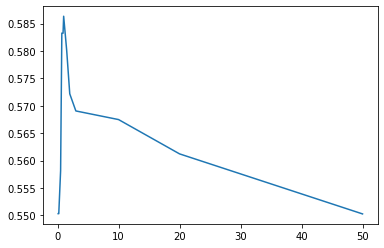

In [21]:
plt.plot(c_list, mean_accuracy)